# Arfan Yusran
## Tugas Matakuliah AI & ML

In [1]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install --upgrade numpy

In [3]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
x  = '/kaggle/input/last-bg/dataset modul 6/train'
path = Path(x)
path.ls()

(#6) [Path('/kaggle/input/last-bg/dataset modul 6/train/bajaj'),Path('/kaggle/input/last-bg/dataset modul 6/train/motor'),Path('/kaggle/input/last-bg/dataset modul 6/train/taksi'),Path('/kaggle/input/last-bg/dataset modul 6/train/truk'),Path('/kaggle/input/last-bg/dataset modul 6/train/mobil'),Path('/kaggle/input/last-bg/dataset modul 6/train/sepeda')]

In [5]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                    ds_tfms=get_transforms(),
                                    batch_tfms=[*aug_transforms(size=224, max_warp=0)],
                                    normalize=imagenet_stats)

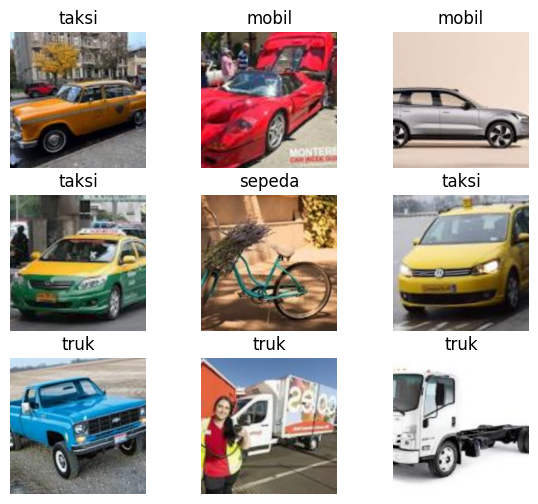

In [6]:
data.show_batch(figsize=(7, 6))

### Print Classes present in the data

In [7]:
data

In [8]:
print(data.dataloaders)

# len(data.datalodataloaders)
data.c

<bound method FilteredBase.dataloaders of (#1548) [(PILImage mode=RGB size=162x90, TensorCategory(2)),(PILImage mode=RGB size=162x103, TensorCategory(2)),(PILImage mode=RGB size=162x85, TensorCategory(4)),(PILImage mode=RGB size=162x108, TensorCategory(4)),(PILImage mode=RGB size=162x121, TensorCategory(5)),(PILImage mode=RGB size=162x69, TensorCategory(0)),(PILImage mode=RGB size=162x108, TensorCategory(2)),(PILImage mode=RGB size=162x108, TensorCategory(4)),(PILImage mode=RGB size=162x108, TensorCategory(4)),(PILImage mode=RGB size=140x140, TensorCategory(3))...]>


6

### Create Model

In [9]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s] 


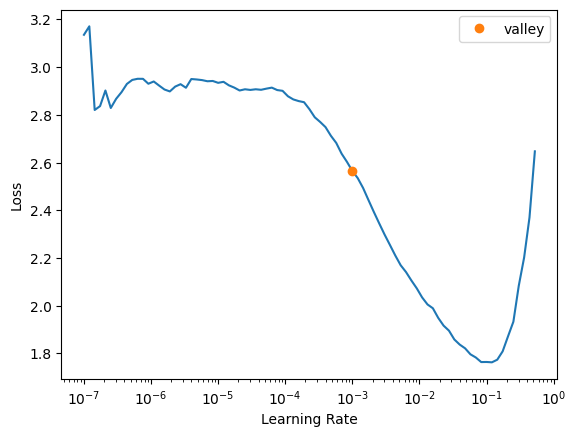

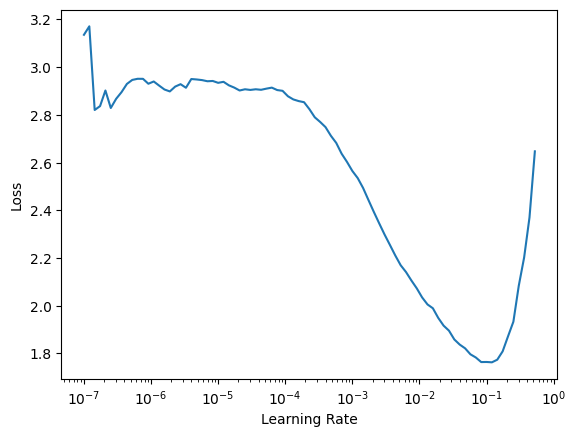

In [10]:
# Menjalankan lr_find
learn.lr_find()

# Menampilkan grafik hasil lr_find
learn.recorder.plot_lr_find()

In [11]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.006171,0.804535,0.826873,00:08
1,0.731063,0.615468,0.819121,00:08
2,0.645209,0.768704,0.808786,00:08
3,0.685492,1.299343,0.798450,00:08
4,0.827892,0.822958,0.824289,00:08
5,0.872775,0.642188,0.855297,00:08
6,0.790094,1.276547,0.782946,00:08
7,0.922100,1.885257,0.777778,00:08
8,1.104956,1.277742,0.790698,00:08
9,1.212239,2.364484,0.808786,00:08


### Hyper Parameter Tuning

In [12]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.297062,0.524037,0.839793,00:07
1,0.297688,0.677218,0.847545,00:07
2,0.277932,0.540578,0.842377,00:07
3,0.282272,0.863815,0.780362,00:07
4,0.257670,1.729223,0.832041,00:07
5,0.229682,0.520657,0.852713,00:07
6,0.191140,0.584255,0.850129,00:07
7,0.169944,0.565757,0.832041,00:07
8,0.164254,0.529069,0.860465,00:07
9,0.150049,2.964279,0.834625,00:07


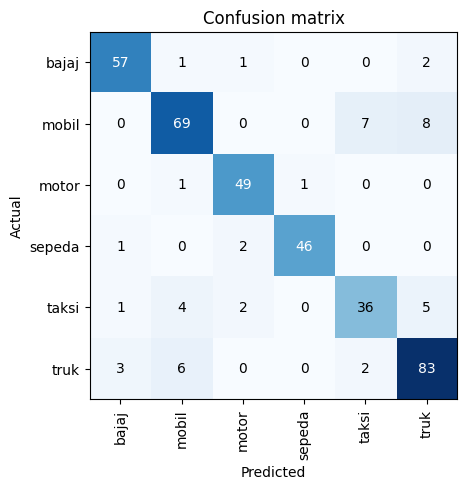

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

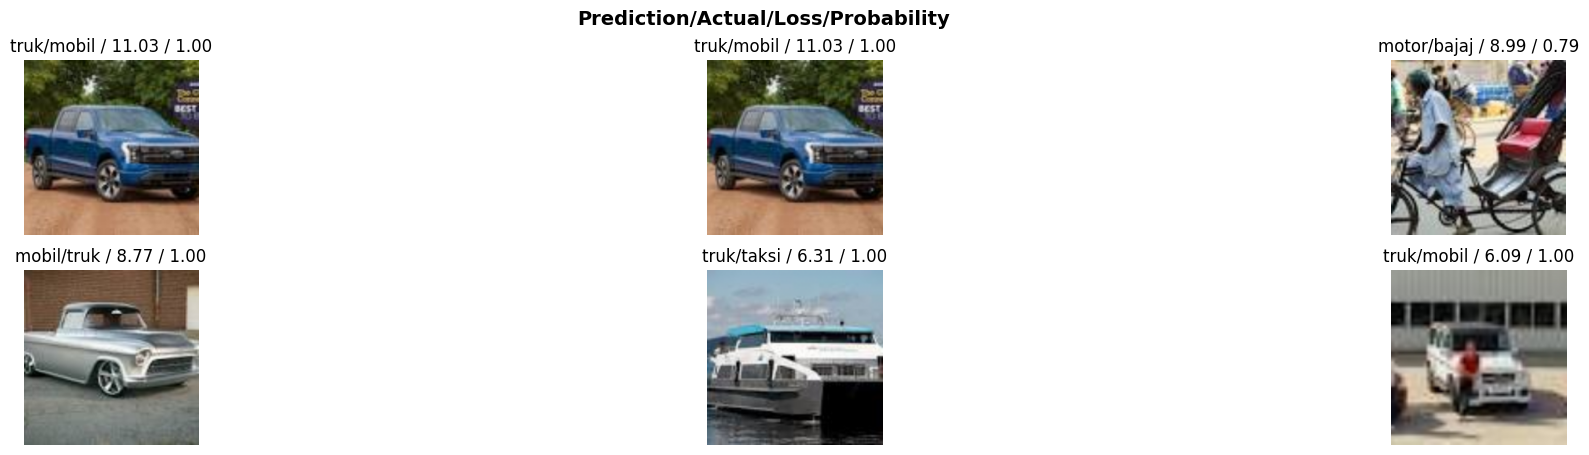

In [14]:
interp.plot_top_losses(6,figsize = (25,5))

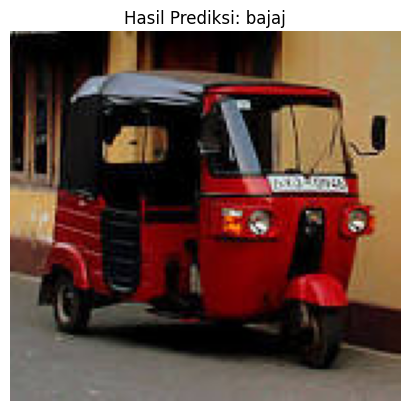

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

img = PILImage.create('/kaggle/input/last-bg/dataset modul 6/test/test_129.jpg')
prediction, _, _ = learn.predict(img)

# # Menampilkan hasil prediksi
# print("Hasil Prediksi:", prediction)

# # Menampilkan gambar
# img.show()

# Menampilkan gambar bersama dengan hasil prediksi menggunakan matplotlib
plt.imshow(img)
plt.title("Hasil Prediksi: " + prediction)
plt.axis('off')
plt.show()


In [16]:
# img = PILImage.create('/kaggle/input/last-bg/dataset modul 6/test/test_129.jpg')
# print(learn.predict(img)[0])

In [17]:
import glob
import pandas as pd
from PIL import Image

# Membuat dataframe kosong untuk menyimpan hasil prediksi
df = pd.DataFrame(columns=['file_name', 'class'])

# Loop untuk setiap file gambar dalam folder
for file in glob.glob('/kaggle/input/last-bg/dataset modul 6/test/*.jpg'):
    # Membuat objek PILImage dari file
    img = PILImage.create(file)
    # Memprediksi kelas gambar dengan model learn
    pred = learn.predict(img)[0]
    # Mendapatkan nama file tanpa path
    file_name = file.split('/')[-1]
    # Membuat dataframe sementara dari nama file dan kelas
    temp = pd.DataFrame({'file_name': [file_name], 'class': [pred]})
    # Menggabungkan dataframe sementara ke dataframe utama
    df = pd.concat([df, temp], ignore_index=True)

# Menyimpan dataframe ke csv tanpa menyertakan index
df.to_csv('predictions.csv', index=False)
